In [33]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn .linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

%matplotlib inline


In [34]:
df = pd.read_csv("Titanic-Dataset.csv",usecols=['Age','Fare','Survived'])

In [35]:
df

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


In [36]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

C:\Users\parth\AppData\Local\Temp\ipykernel_22284\694922604.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(),inplace=True)


In [37]:
x=df.iloc[:,1:3]
y=df.iloc[:,0]

In [38]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=42)

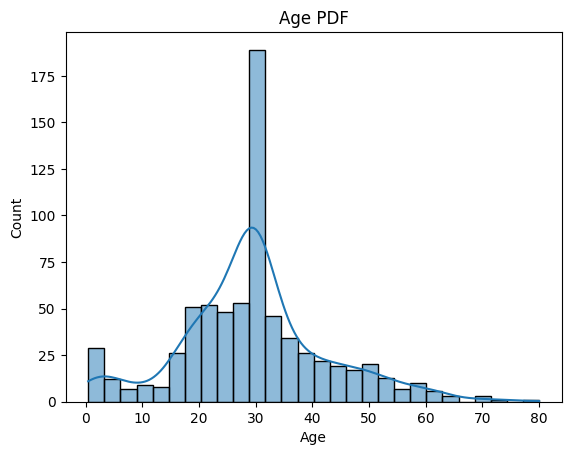

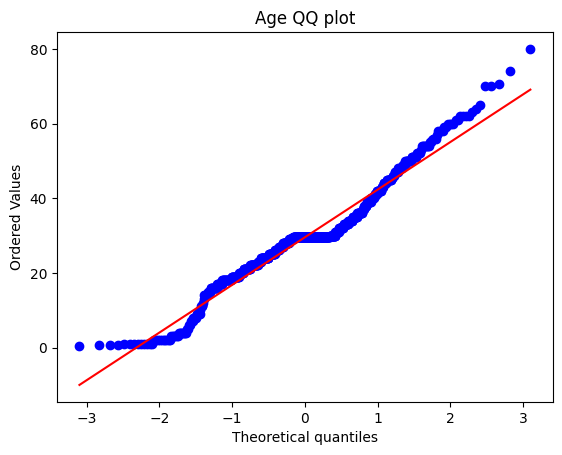

In [40]:

sns.histplot(xtrain['Age'],kde=True)
plt.title('Age PDF')
plt.show()



stats.probplot(xtrain['Age'],dist='norm',plot=plt)
plt.title('Age QQ plot')
plt.show()



### The age columns values are nearly normally distribited

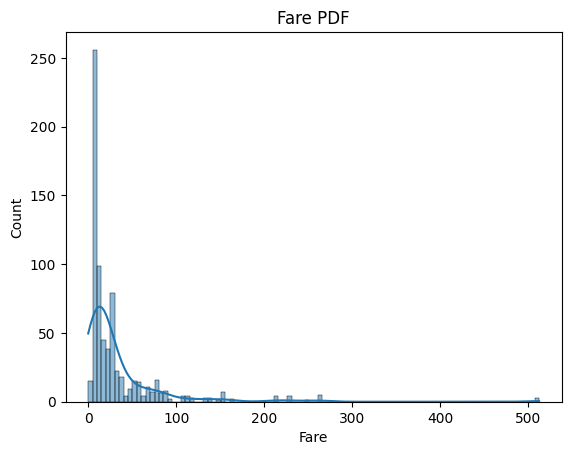

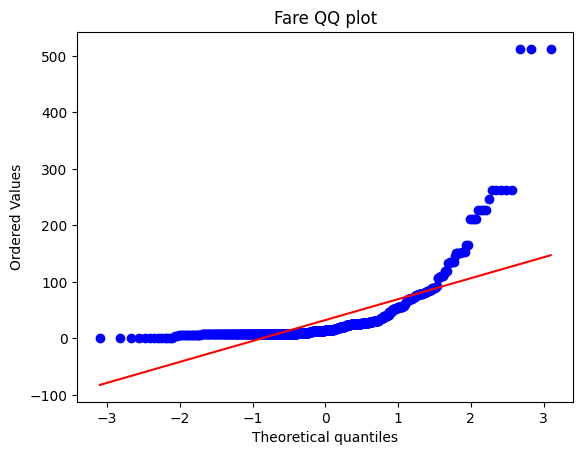

In [41]:

sns.histplot(xtrain['Fare'],kde=True)
plt.title('Fare PDF')
plt.show()



stats.probplot(xtrain['Fare'],dist='norm',plot=plt)
plt.title('Fare QQ plot')
plt.show()



### This is not nomally distributed. This is right skewed distribution
### Many people spends amrge amt of money to get premium class in titaninc, so it is right skewed.

#### So i can go with log transform, to make it normally distributed (PDF)

In [42]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [50]:
clf.fit(xtrain,ytrain)
clf2.fit(xtrain,ytrain)

y_pred = clf.predict(xtest)
y_pred1 = clf2.predict(xtest)

print(f'accuracy_score of LR is {accuracy_score(ytest,y_pred)}')
print(f'accuracy_score of DT is {accuracy_score(ytest,y_pred1)}')

accuracy_score of LR is 0.6480446927374302
accuracy_score of DT is 0.6703910614525139


In [51]:
transformer = FunctionTransformer(func=np.log1p)
transformer

FunctionTransformer(func=<ufunc 'log1p'>)

In [52]:
xtrain_transformed = transformer.fit_transform(xtrain)
xtest_transformed = transformer.fit_transform(xtest)

In [53]:
xtrain_transformed

,Age,Fare
331,3.839452,3.384390
733,3.178054,2.639057
382,3.496508,2.188856
704,3.295837,2.180892
813,1.945910,3.474293
...,...,...
106,3.091042,2.157559
270,3.424234,3.465736
860,3.737670,2.715244
435,2.708050,4.795791


In [61]:
clf.fit(xtrain_transformed,ytrain)
clf2.fit(xtrain_transformed,ytrain)

y_pred = clf.predict(xtest)
y_pred1 = clf2.predict(xtest)

print(f'accuracy_score of LR is {accuracy_score(ytest,y_pred)}')
print(f'accuracy_score of DT is {accuracy_score(ytest,y_pred1)}')

accuracy_score of LR is 0.7374301675977654
accuracy_score of DT is 0.5865921787709497


In [59]:
clf.fit(xtrain_transformed,ytrain)
clf2.fit(xtrain_transformed,ytrain)

y_pred = clf.predict(xtest_transformed)
y_pred1 = clf2.predict(xtest_transformed)

print(f'accuracy_score of LR is {accuracy_score(ytest,y_pred)}')
print(f'accuracy_score of DT is {accuracy_score(ytest,y_pred1)}')

accuracy_score of LR is 0.6815642458100558
accuracy_score of DT is 0.6703910614525139


### It is better with xtest while fitting, rather than xtest_transformed

In [62]:
x_transformed = transformer.fit_transform(x)


print(f'LR {np.mean(cross_val_score(clf,x_transformed,y,scoring='accuracy',cv=10))}')
print(f'DT {np.mean(cross_val_score(clf2,x_transformed,y,scoring='accuracy',cv=10))}')


LR 0.678027465667915
DT 0.6532709113607991


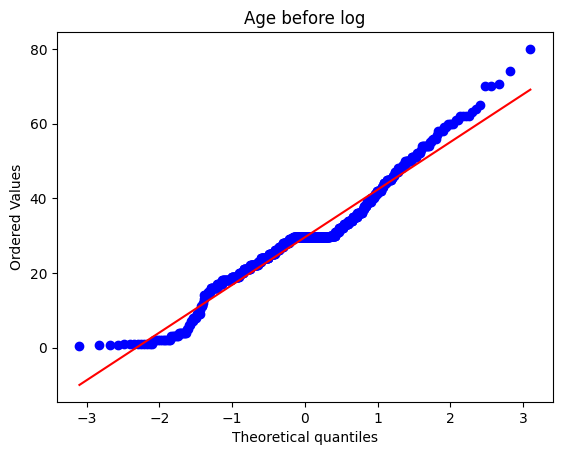

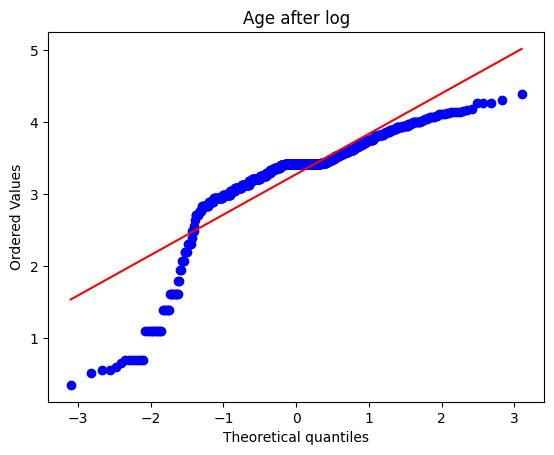

In [63]:

stats.probplot(xtrain['Age'],dist='norm',plot=plt)
plt.title('Age before log')
plt.show()

stats.probplot(xtrain_transformed['Age'],dist='norm',plot=plt)
plt.title('Age after log')
plt.show()

### In age column, the before age distribution is better than after transforamtion

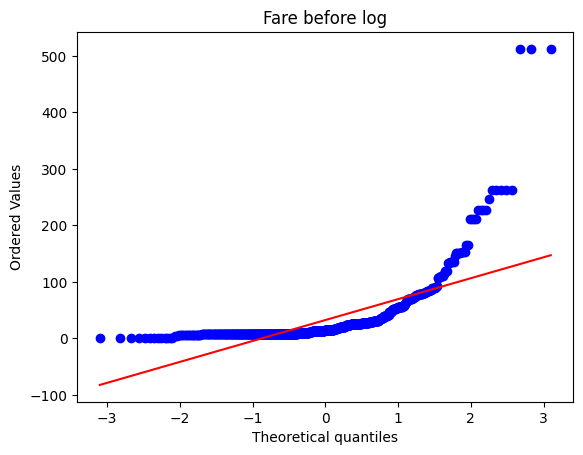

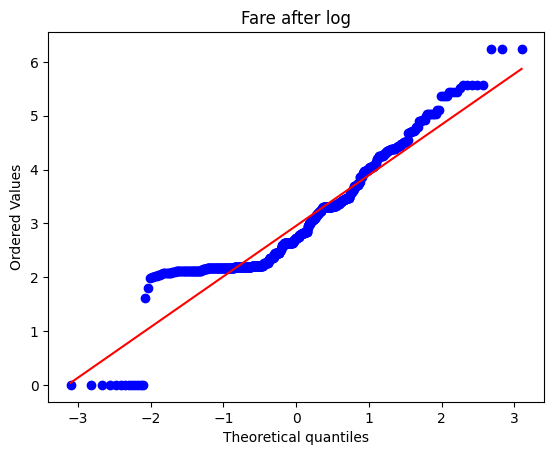

In [64]:

stats.probplot(xtrain['Fare'],dist='norm',plot=plt)
plt.title('Fare before log')
plt.show()

stats.probplot(xtrain_transformed['Fare'],dist='norm',plot=plt)
plt.title('Fare after log')
plt.show()

### The fare columm, After log transformation it is neally normally distributed

### now take the previous 'age distribution' and 'fare transformed distribution' and check the output

In [65]:
transformer2 = ColumnTransformer([('log',FunctionTransformer(np.log1p),['Fare'])],remainder='passthrough')


In [66]:
xtrain_transformed2 = transformer2.fit_transform(xtrain)
xtest_transformed2 = transformer2.fit_transform(xtest)

In [67]:
xtrain_transformed2

array([[ 3.38439026, 45.5       ],
       [ 2.63905733, 23.        ],
       [ 2.18885633, 32.        ],
       ...,
       [ 2.71524426, 41.        ],
       [ 4.79579055, 14.        ],
       [ 4.36038795, 21.        ]], shape=(712, 2))

In [68]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(xtrain_transformed2,ytrain)
clf2.fit(xtrain_transformed2,ytrain)

y_pred = clf.predict(xtest_transformed2)
y_pred2 = clf2.predict(xtest_transformed2)

print(f'accuracy_score of LR is {accuracy_score(ytest,y_pred)}')
print(f'accuracy_score of DT is {accuracy_score(ytest,y_pred2)}')

accuracy_score of LR is 0.6703910614525139
accuracy_score of DT is 0.6815642458100558
